In [1]:
import pygrib
import cartopy.crs as ccrs
# import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np

In [2]:
filepath = "D:/wonderland\projects/synop_data_project/plot metmaps/grib2/data/one.grib2"
grib_file = pygrib.open(filepath)

In [3]:
data = {}
for grib in grib_file:
    data[grib.name] = [grib.values, grib.units]

In [4]:
for var in data.keys():
    print(f'unit of {var} is {data[var][1]}')

unit of U component of wind is m s**-1
unit of V component of wind is m s**-1
unit of Temperature is K
unit of Surface pressure is Pa
unit of 2 metre temperature is K
unit of 10 metre U wind component is m s**-1
unit of 10 metre V wind component is m s**-1
unit of Tropopause pressure is Pa
unit of Pressure is Pa


In [11]:
selected_temp = grib_file.select(name='Temperature')[0]
selected_press = grib_file.select(name = 'Surface pressure')[0]
u_comp = grib_file.select(name='U component of wind')[0]
v_comp = grib_file.select(name='V component of wind')[0]

In [6]:
type(v_comp)

pygrib._pygrib.gribmessage

In [12]:
temp, lats, lons = selected_temp.data()
press, _, _ = selected_press.data()
u_wind, _, _ = u_comp.data()
v_wind, _, _ = v_comp.data()

In [14]:
press.min()

65783.78125

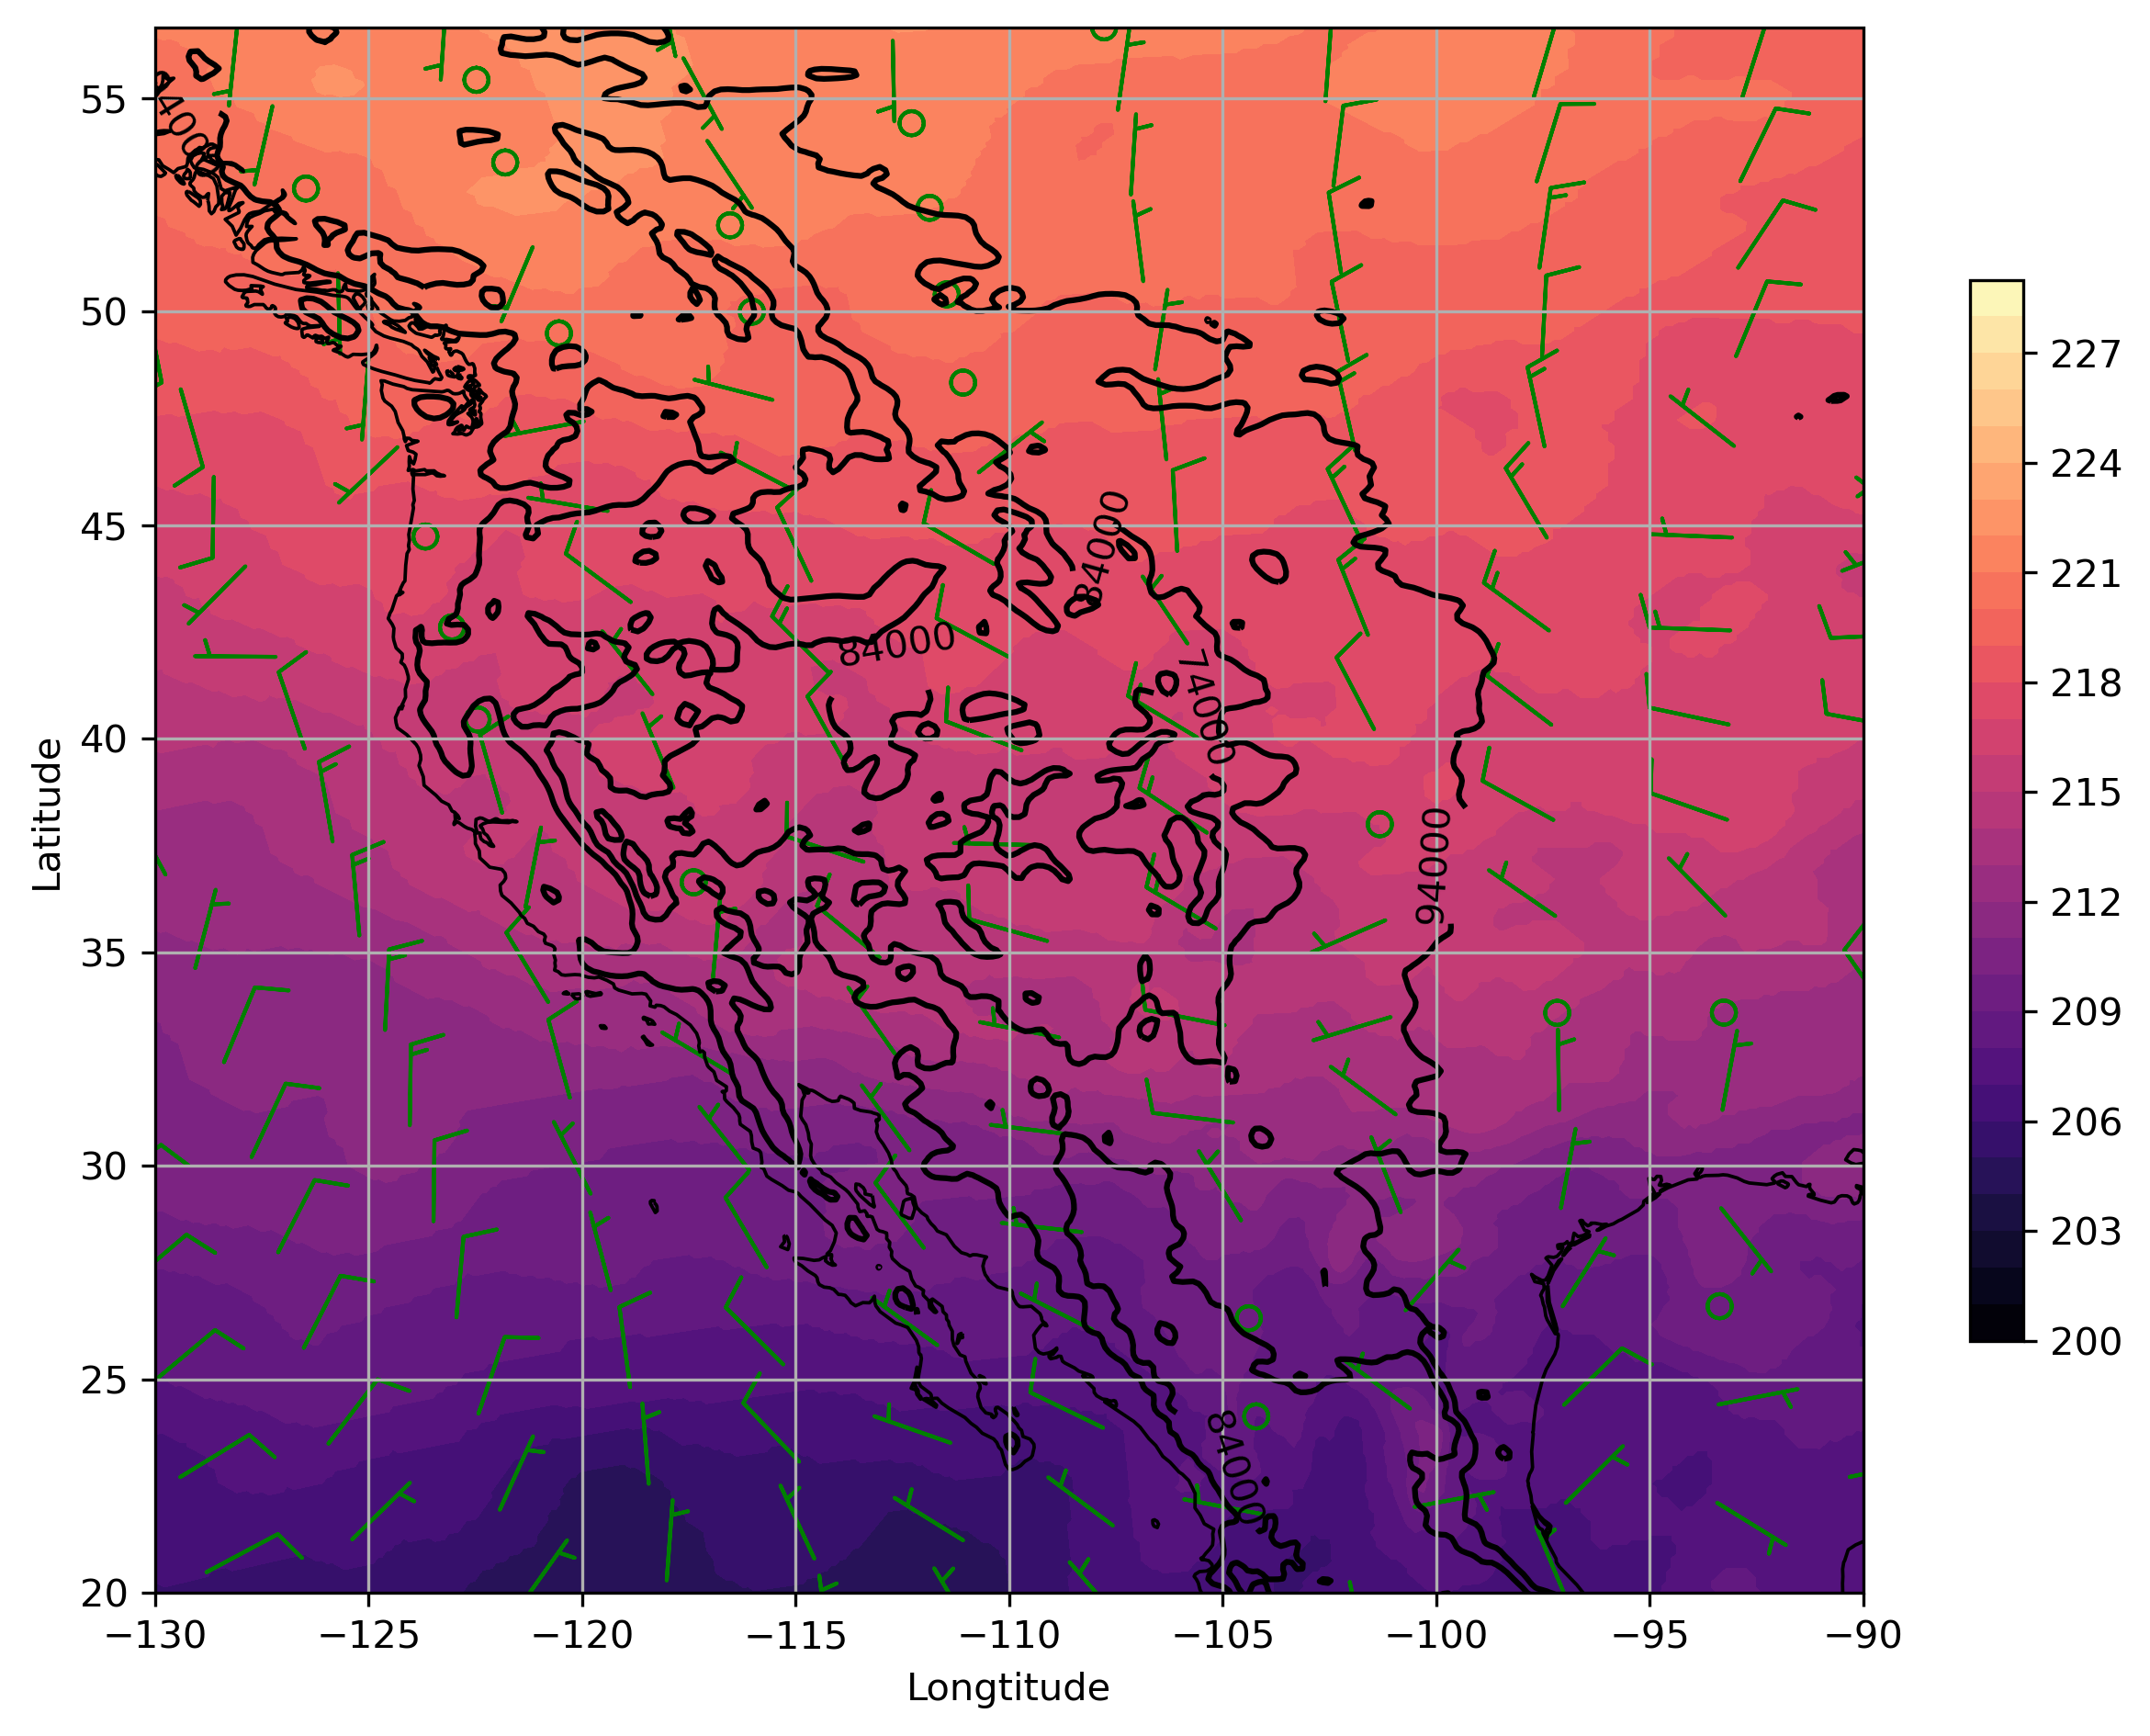

In [74]:
proj = ccrs.PlateCarree()
fig = plt.figure(figsize=(10, 10), dpi=300)
ax = plt.axes(projection=proj)
ax.coastlines(linewidth=0.9)
temp_lvl = np.arange(200, 230, 1)
press_lvl = np.arange(64000, 104000, 10000)
temp_contours = plt.contourf(lons, lats,
            temp, 
            levels=temp_lvl,
            transform=proj,
            cmap=plt.cm.magma)
press_contours = plt.contour(lons, lats,
                             press,
                             levels=press_lvl,transform=proj,
                             colors = 'k')
plt.clabel(press_contours, fmt='%i')
plt.colorbar(temp_contours, ax=ax, shrink=0.5)
# ax.set_xlabel('Longtitude')
# ax.set_ylabel('Latitude')
ax.set_extent([-130, -90, 20, 55])

# plot barbs
thin = [int(x/20.) for x in lons.shape]
plt.barbs(lons[::thin[0], ::thin[1]],
         lats[::thin[0], ::thin[1]],
         u_wind[::thin[0], ::thin[1]],
         v_wind[::thin[0], ::thin[1]],
         transform=proj,
         color = 'green',
         length=6.5)


ax.set_xticks(np.arange(-130, -89, 5), crs=proj)
ax.set_yticks(np.arange(20, 56, 5), crs=proj)



ax.gridlines()


plt.xlabel('Longtitude')
plt.ylabel('Latitude')
plt.show()


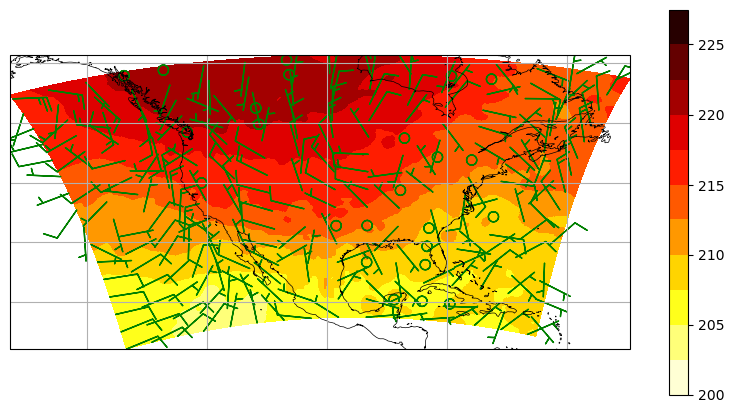

In [59]:
proj = ccrs.PlateCarree()
fig = plt.figure(figsize=(10, 10), dpi=100)
ax = plt.axes(projection=proj)
ax.coastlines(linewidth=0.5)
temp_lvl = np.arange(200, 230, 2.5)
press_lvl = np.arange(11000, 50000, 10000)
temp_contours = plt.contourf(lons, lats,
            temp, 
            levels=temp_lvl,
            transform=proj,
            cmap=plt.cm.hot_r)
press_contours = plt.contour(lons, lats,
                             press,
                             levels=press_lvl,transform=proj,
                             colors = 'k')
# plot barbs
thin = [int(x/15.) for x in lons.shape]
plt.barbs(lons[::thin[0], ::thin[1]],
         lats[::thin[0], ::thin[1]],
         u_wind[::thin[0], ::thin[1]],
         v_wind[::thin[0], ::thin[1]],
         transform=proj,
         color = 'green')
ax.gridlines()




plt.clabel(press_contours, fmt='%i')
plt.colorbar(temp_contours, ax=ax, shrink=0.5, extendrect=True)
plt.show()
